<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Teoría" data-toc-modified-id="Teoría-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Teoría</a></span><ul class="toc-item"><li><span><a href="#La-volatilidad" data-toc-modified-id="La-volatilidad-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>La volatilidad</a></span></li><li><span><a href="#Anualización-del-nivel-de-riesgo" data-toc-modified-id="Anualización-del-nivel-de-riesgo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Anualización del nivel de riesgo</a></span></li><li><span><a href="#Métricas-para-ajustar-el-rendimiento-al-riesgo" data-toc-modified-id="Métricas-para-ajustar-el-rendimiento-al-riesgo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Métricas para ajustar el rendimiento al riesgo</a></span></li></ul></li><li><span><a href="#Práctica" data-toc-modified-id="Práctica-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Práctica</a></span><ul class="toc-item"><li><span><a href="#Cargar-precios" data-toc-modified-id="Cargar-precios-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cargar precios</a></span></li><li><span><a href="#Calcular-rendimientos" data-toc-modified-id="Calcular-rendimientos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calcular rendimientos</a></span></li><li><span><a href="#Nivel-de-riesgo" data-toc-modified-id="Nivel-de-riesgo-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Nivel de riesgo</a></span></li><li><span><a href="#Anualización-de-la-volatilidad" data-toc-modified-id="Anualización-de-la-volatilidad-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Anualización de la volatilidad</a></span></li><li><span><a href="#Métricas-para-ajustar-el-rendimiento-al-riesgo" data-toc-modified-id="Métricas-para-ajustar-el-rendimiento-al-riesgo-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Métricas para ajustar el rendimiento al riesgo</a></span></li></ul></li></ul></div>

## Librerías

In [1]:
import empyrical as em
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Teoría

### La volatilidad

Un aspecto más importante que los retornos, en cierto sentido, es la volatilidad. Así que vamos a empezar de nuevo, con la misma serie de retorno que vimos antes, tenemos la serie azul y la serie naranja. Un mayor valor de volatilidad significa que los retornos se están desviando del valor medio más a menudo y más significativamente que en valores bajos de volatilidad. 

Una vez conocidos los rendimientos en un conjunto de operaciones el siguiente paso es  calcular el riesgo o  volatilidad (desviación estándar) que puede realizarse con la función __.std()__ de pandas obteniendo de esta forma  una medida de riesgo. 

__Formulación.__

La desviación estándar trata de medir la dispersión de los retornos, es decir, hasta qué punto se desvían de la media.
Para ello, en primer lugar se calcula la varianza como el valor promedio de la distancia al cuadrado de las desviaciones respecto a la media. De esta forma las desviaciones obtenidas $(R_{i} - R_{mean})$ miden el la distancia que cada retorno tiene respecto la media, es decir, el spread, obteniendo valores positivos y negativos. Para poder tener una medida que represente la distancia se elevan al cuadrado las desviaciones. Una vez se calcula las disviaciones al cuadrado se promedia dicho valor obteniendo lo que se conoce como varianza. 

Una vez calculada la varianza, para poder compararlo con los propios retornos, generalmente, se utiliza como medida de volatilidad la raíz cuadrada de la varianza, es decir, la desviación típica. Mayor es la volatilidad significa mayor desviación de los retornos respecto a la media.

La ecuación utilizada para calcular la volatilidad poblacional es:

\begin{align}
\sigma_{R} = \sqrt{\frac{1}{N}\sum^{N}_{i=1}{(R_{i} - R_{mean})^{2}}}
\end{align}


La desviación típica de las muestras de una distribución método (numpy.std()) se calcula como:
\begin{align}
\sigma_{R} = \sqrt{\frac{1}{N-1}\sum^{N}_{i=1}{(R_{i} - R_{mean})^{2}}}
\end{align}


### Anualización del nivel de riesgo

De la misma forma que sucede con los retornos, para poder comparar las voltailidades en series con distinta granualidad es necesario la anualización de las mismas.

Por ejemplo, con retornos diarios sin aplicar la anualización de la volatilidad se notará en mayor medida la volatilidad porque se tiene una mayor cantidad de puntos en los datos datos. Sin embargo, cuando los retornos se obtienen con una granualidad mensual se tiene un menor número de puntos intermedios y el valor obtenido no se podrá comparar con el obtenido con una granulanidad distinta. 

La forma en que anualiza la volatilidad es multiplicar la volatilidad que obtiene de los datos (Ej. diarios) por el número de períodos dentro de un año (Ej.días al año; 252). 

__Formulación.__

\begin{align}
\sigma_{ann} = \sigma_{p}\sqrt{p}
\end{align}

__Ejemplo 1.__

Si se tiene una volatilidad de 0.1% calculada con datos diarios, para anualizar se toma ese 0.1% y se multiplica por la raiz cuadrada de 252 obteniendo una volatilidad anual de 0.001, y tú multiplicaste por la raíz cuadrada de 252, y eso te da 15,8%. 

__Ejemplo 2.__

Supongamos que se trabaja con datos mensuales. Para obtener la volatilidad anualizada se toma la volatilidad calculada en mensualmente y se multiplicada por la raíz cuadrada de 12. 

__Pregunta. La volatilidad anualizada es siempre mayor que la volatilidad mensual. ¿Verdadero o falso?__

Es cierto. Como se multiplica la volatilidad mensual por la raíz cuadrada de 12, el resultado siempre será mayor que la volatilidad mensual.


### Métricas para ajustar el rendimiento al riesgo

Una vez conocido como es posible calcular los retornos y el riesgo, es necesario conocer algún tipo de método para comparar los retornos con un nivel de riesgo diferente. 


Por ejemplo, en el siguiente gráfico está representado los retornos desde 1926 a 2018 de dos carteras diferentes de EEUU. 

<img src="images/MedidasRiesgoAjustadoEjemplo.png" width="400" height="200">

Como se puede observar el activo azul son retornos mucho más volátiles, concretamente, la volatilidad anualizada es del 36.8% con un rendimiento más alto del 17.2%. Por otro lado, el activo naranja obtuvo un rendimiento del 9.5% durante ese mismo período anualizado pero con una volatilidad mucho menor del 18.7%. Entonces, ¿cómo se comparan los dos activos? 

Una posibilidad de comparación es simplemente calcular la proporción, es decir, ¿cuánto rendimiento se obtuvo por unidad de riesgo? A esta relación se le conoce como __la relación de retorno del riesgo__. 

\begin{align}
R_{return,risk} = \frac{return}{risk}
\end{align}

Utilizando la relación de retorno del riesgo se obtiene que el activo azul obtuvo un valor de 0.47 mientras que el naranja de 0.5 que indica que, aunque el activo naranja obtuvieron rendimientos más bajos presentan un mejor retorno por unidad de volatilidad.


Sin embargo, para obtener una métrica más exacta Pero voy a sugerir un ajuste que tienes que hacer para obtener una imagen aún mejor.  
Si acabas de hacer el cálculo muy simple que dije, esa es la relación entre retorno y riesgo. Parece que las gorras pequeñas te dieron alrededor de 0.47, las gorras grandes te dieron alrededor de 0.50, podría sugerir que aunque las gorras grandes te dieron rendimientos más bajos. En realidad te dieron un mejor retorno por unidad de volatilidad, ¿verdad? Así que podrías pensar, de acuerdo, bueno, tal vez las gorras pequeñas no eran tan geniales después de todo.

Por lo tanto, la idea es que no se debe mirar el retorno, si no que es más recomendable observar el exceso de rendimiento por unidad de volatilidad, es decir,  el exceso de rendimiento sobre lo que se podría haber conseguido sin volatilidad. Al valor que se puede obtener sin volatilidad se le conoce como __la tasa libre de riesgo__. 

La tasa libre de riesgo es básicamente el rendimiento que se obtiene con riesgo prácticamente nulo. Si se conoce el valor de dicha tasa (Ej. 3%) es posible calcular __la relación entre el rendimiento excesivo sobre la tasa libre de riesgo por volatilidad__ conocido como el __Sharpe Ratio__. 

\begin{align}
Sharpe Ratio (P) = \frac{R_{p} - R_{f}}{\sigma_{p}}
\end{align}

La diferencia $(R_{p} - R_{f})$ también se denomina como retorno __exceso de rentabilidad__ o __retorno sobre la tasa libre de riesgo.__

El Sharpe ratio es una de las métricas más significativas en el análisis de portfolios. En el ejemplo anterior (activos azul y naranja) sería:

- Activo Azul (Small Cap Stocks). $Sharpe Ratio = (17.2 - 3)/36.8 = 0.39$ 
- Activo Naranja (Large Cap Stocks). $Sharpe Ratio = (9.5 - 3)/0.35 = 0.35$ 

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Práctica

### Cargar precios

In [2]:
df_prices = pd.read_csv('../data/sample_prices.csv')
df_prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


### Calcular rendimientos

In [3]:
df_returns = df_prices.pct_change().dropna(axis=0)
df_returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


### Nivel de riesgo

In [4]:
# Fórmula de la desviación típica como métrica de riesgo
deviations = df_returns - df_returns.mean()
squared_deviations = pow(deviations,2)
mean_squared_deviations = squared_deviations.mean()
volatility = np.sqrt(mean_squared_deviations)
print('Volatility = mean_squared_deviations / n',volatility,sep=2*'\n')

Volatility = mean_squared_deviations / n

BLUE      0.022957
ORANGE    0.076212
dtype: float64


In [5]:
# Método de pandas de la desviación típica (std)
volatility = df_returns.std()
variance = pow(volatility, 2)
print('Volatility = mean_squared_deviations/(n-1)',volatility,sep=2*'\n')

Volatility = mean_squared_deviations/(n-1)

BLUE      0.023977
ORANGE    0.079601
dtype: float64


¿Por qué no coinciden? 

Por defecto, el método .std() calcula la desviación estándar de la muestra, es decir, utiliza un denominador igual a $(𝑛-1)$, es decir, que los rendimientos observados se consideran muestras observadas de una distribución. Mediannte la formula planteada previamente, se calcula la desviación típica de la población utilizando un denominador igual a $𝑛$, es decir, la desviación estandar de la población

In [6]:
number_of_obs = df_returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
print('Volatility = mean_squared_deviations/(n-1)',volatility,sep=2*'\n')

Volatility = mean_squared_deviations/(n-1)

BLUE      0.023977
ORANGE    0.079601
dtype: float64


### Anualización de la volatilidad

La volatilidad se anualiza escalando (multiplicando) por la raíz cuadrada del número de períodos por observación.

Por tanto, para anualizar la volatilidad de una serie mensual, la muiltiplicamos por la raíz cuadrada de 12. En lugar de utilizar np.sqrt() podemos elevarlo a la potencia de 0.5.

In [7]:
annualized_vol = df_returns.std()*(12**0.5)
print('Annualized Vol', annualized_vol,sep='\n')

Annualized Vol
BLUE      0.083060
ORANGE    0.275747
dtype: float64


### Métricas para ajustar el rendimiento al riesgo

Vayamos más allá de las series de datos de muestra y empecemos a trabajar con datos reales. Leamos en los rendimientos mensuales de un conjunto de 10 carteras formadas en base a la capitalización del mercado, o a las acciones de mercado de las empresas. De las 10 carteras, sólo queremos fijarnos en las empresas de mayor y menor capitalización.

Nota:
Los datos ya se dan en porcentajes (es decir, 4.5 en lugar de 0.045) y normalmente queremos utilizar los números reales (es decir, 0.045 en lugar de 4.5) por lo que debemos dividir los datos brutos del archivo por 100.

El dataset es un conjunto de datos muy grande y va desde 2016 hasta 2018-12. 

Cada fila representa los datos de cada mes desde 1926-07 hasta diciembre de 2018. 

- La primera columna es la fecha, es una especie de sello de fecha. 

- El resto de columnas son un diferentes tipos de carteras.

- Los valores igual a -99 corresponden a valores nulos, es decir, que los datos no están disponibles.

- El resto de columnas representan rendimientos para diferentes tipos de cartera.

    - Cartera con valor por debajo de 30.
    
    - Cartera de mediana 40.
    
    - Cartera de altura 30. 
    
    - Cartera con el 40 por ciento medio.
    
    - Cartera con el 30 ciento más alto.
    
    - Carteras de quantiles. Se dividen en cinco grupos.
    

    - Carteras de deciles. Se divide en 10 grupos. 
    
    
Por lo tanto, se toma el valor Hi10 para analizar 10% más grande de rendimientos y Lo10 son los retornos correspondientes al 10% más pequeño del conjunto de datos.

In [8]:
df_mem = pd.read_csv('../data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)
df_mem

# Formato de la marca temporal
series_date_time =  list()
for date_value in df_mem.index:
    date_value = str(date_value)
    date_value = f'{date_value[:4]}-{date_value[4:]}'
    series_date_time.append(date_value)

series_date_time = np.array(series_date_time)
df_mem.index=series_date_time
df_mem.index = pd.to_datetime(df_mem.index)

df_mem.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07-01,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08-01,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09-01,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10-01,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11-01,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [9]:
# Seleccionar empresas de mayor capitalización
cols = ['Lo 10', 'Hi 10']
df_returns = df_mem[cols]
df_returns.columns = ['SmallCap', 'LargeCap']
df_returns = df_returns/100
df_returns

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


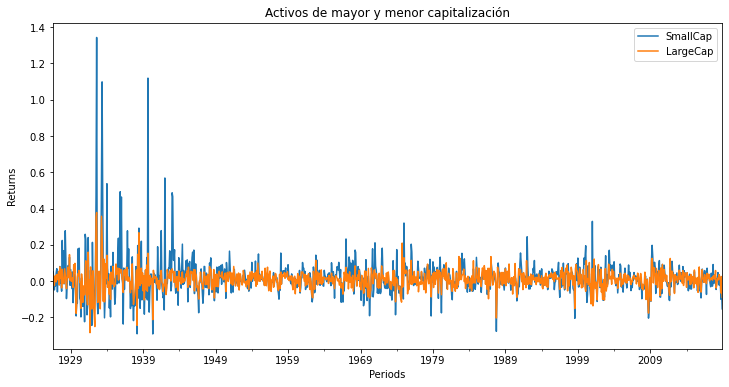

In [10]:
_ = df_returns.plot(figsize=(12,6), title='Activos de mayor y menor capitalización', ylabel='Returns', xlabel='Periods')

In [11]:
# Calcular volatilidad anualizada para comparar ambos activos
annualized_vol = df_returns.std()*np.sqrt(12)
print('Volatilidad anualizada',annualized_vol,sep='\n')

Volatilidad anualizada
SmallCap    0.368193
LargeCap    0.186716
dtype: float64


In [12]:
# Calcular retornos mensuales
n_months = df_returns.shape[0]
return_per_month = (df_returns+1).prod()**(1/n_months) - 1
print('Rendimientos mensuales',return_per_month,sep='\n')
print(2*'\n')

# Método 1 - Calcular retornos anualizados 
annualized_return = (return_per_month + 1)**12-1
print('Método 1 - Rendimientos anualizados',annualized_return,sep='\n')

Rendimientos mensuales
SmallCap    0.012986
LargeCap    0.007423
dtype: float64



Método 1 - Rendimientos anualizados
SmallCap    0.167463
LargeCap    0.092810
dtype: float64


In [13]:
# Método 2 - Calcular retornos anualizados 
annualized_return = (df_returns+1).prod()**(12/n_months) - 1
print('Método 2 - Rendimientos anualizados',annualized_return,sep='\n')

Método 2 - Rendimientos anualizados
SmallCap    0.167463
LargeCap    0.092810
dtype: float64


In [14]:
# Ratio de retorno sobre riesgo
return_risk_ratio_ann = annualized_return/annualized_vol
print('Ratio de retorno sobre el riesgo anualizado', return_risk_ratio_ann, sep='\n')

Ratio de retorno sobre el riesgo anualizado
SmallCap    0.454825
LargeCap    0.497063
dtype: float64


In [15]:
# Sharpe ratio
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
print('Sharpe Ratio', sharpe_ratio, sep='\n')

Sharpe Ratio
SmallCap    0.373346
LargeCap    0.336392
dtype: float64
